## Note: All had 5 000 Epochs expect for the 0.05 and 0.01 which had 3 500 Epochs

In [20]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
from tqdm import trange, tqdm
import joblib
import matplotlib.pyplot as plt


In [21]:

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True, num_layers=3)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (h_n, _) = self.rnn(x)
        out = self.fc(h_n[-1])
        return out


# Define custom dataset
class PacketCaptureDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]


Model Name: 10s_1s
Average Absolute Error: 0.26858555276528934
Average Absolute Error (Denormalized): 30.355573654174805
Median Absolute Error: 0.06459644436836243
Median Absolute Error (Denormalized): 7.300698280334473
Mean Square Error: 0.7138533590386905
Mean Square Error (Denormalized): 9118.4384765625
Average Percentage Error: 305.6456743276244%
Standard Deviation of Percentage Errors: 33.385453179306914
Average Percentage Error (Without Top 2%): 65.30595397949219%
Standard Deviation of Percentage Errors (Without Top 2%): 33.7223770484261
Average Percentage Error (Denormalized): 826.6326904296875%
Standard Deviation of Percentage Errors (Denormalized): 33.26728820800781
Average Percentage Error (Without Top 2%, Denormalized): 65.30595397949219%
Standard Deviation of Percentage Errors (Without Top 2%, Denormalized): 33.56299591064453
Median Percentage Error: 29.150074217422233%
Median Percentage Error (Denormalized): 133.9508295059204%


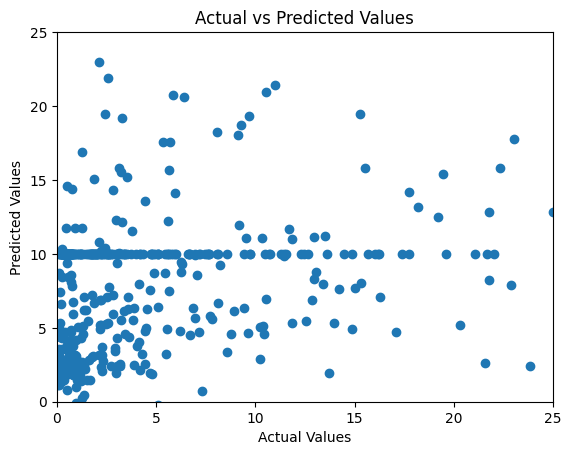

Model Name: 10s_5s
Average Absolute Error: 0.3933720664428741
Average Absolute Error (Denormalized): 44.43294906616211
Median Absolute Error: 0.21024537086486816
Median Absolute Error (Denormalized): 23.748058319091797
Mean Square Error: 1.3163530964299073
Mean Square Error (Denormalized): 16794.83203125
Average Percentage Error: 175.20911008599808%
Standard Deviation of Percentage Errors: 8.89444018393118
Average Percentage Error (Without Top 2%): 99.17758178710938%
Standard Deviation of Percentage Errors (Without Top 2%): 8.983317549612895
Average Percentage Error (Denormalized): 2960.1982421875%
Standard Deviation of Percentage Errors (Denormalized): 122.79107666015625
Average Percentage Error (Without Top 2%, Denormalized): 99.17758178710938%
Standard Deviation of Percentage Errors (Without Top 2%, Denormalized): 114.94920349121094
Median Percentage Error: 103.92760591545418%
Median Percentage Error (Denormalized): 360.7008457183838%


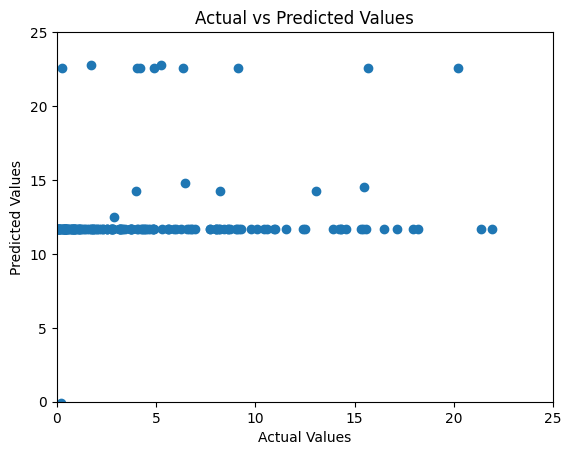

Model Name: 15s_0.2s
Average Absolute Error: 32.19266703167305
Average Absolute Error (Denormalized): 3633.27490234375
Median Absolute Error: 5.553298190236092
Median Absolute Error (Denormalized): 626.7471923828125
Mean Square Error: 19069.946038344682
Mean Square Error (Denormalized): 242902656.0
Average Percentage Error: 653056.520011724%
Standard Deviation of Percentage Errors: 152734.95391751712
Average Percentage Error (Without Top 2%): 6431.97119140625%
Standard Deviation of Percentage Errors (Without Top 2%): 154282.75281524495
Average Percentage Error (Denormalized): 83613.6171875%
Standard Deviation of Percentage Errors (Denormalized): 2259.883056640625
Average Percentage Error (Without Top 2%, Denormalized): 6431.97119140625%
Standard Deviation of Percentage Errors (Without Top 2%, Denormalized): 2160.85791015625
Median Percentage Error: 2486.6618680605043%
Median Percentage Error (Denormalized): 20379.205322265625%


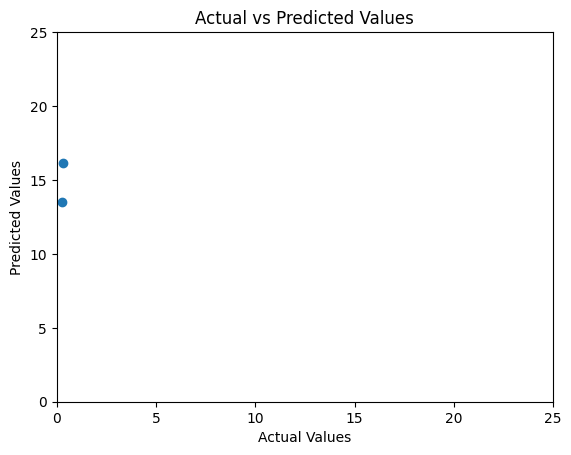

Model Name: 15s_0.05s
Average Absolute Error: 28.620510478860233
Average Absolute Error (Denormalized): 3230.27490234375
Median Absolute Error: 5.62211736291647
Median Absolute Error (Denormalized): 634.54443359375
Mean Square Error: 9521.94093619225
Mean Square Error (Denormalized): 121296840.0
Average Percentage Error: 26948.581615572544%
Standard Deviation of Percentage Errors: 1565.065318049808
Average Percentage Error (Without Top 2%): 6474.12109375%
Standard Deviation of Percentage Errors (Without Top 2%): 1575.3746534286636
Average Percentage Error (Denormalized): 177185.578125%
Standard Deviation of Percentage Errors (Denormalized): 32900.6796875
Average Percentage Error (Without Top 2%, Denormalized): 6474.12109375%
Standard Deviation of Percentage Errors (Without Top 2%, Denormalized): 33233.9296875
Median Percentage Error: 2555.6262592564685%
Median Percentage Error (Denormalized): 15712.942504882812%


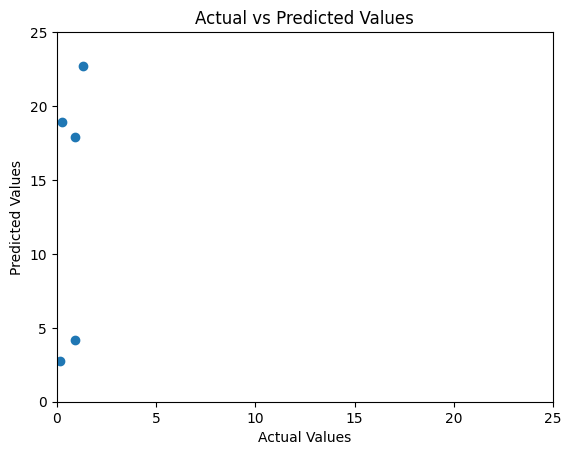

Model Name: 10s_0.2s
Average Absolute Error: 0.23101192130202738
Average Absolute Error (Denormalized): 26.101242065429688
Median Absolute Error: 0.026361651718616486
Median Absolute Error (Denormalized): 2.9785099029541016
Mean Square Error: 0.7421788712334128
Mean Square Error (Denormalized): 9474.619140625
Average Percentage Error: 274.3368315913098%
Standard Deviation of Percentage Errors: 32.63235071000203
Average Percentage Error (Without Top 2%): 50.017208099365234%
Standard Deviation of Percentage Errors (Without Top 2%): 32.96147084946673
Average Percentage Error (Denormalized): 202.89967346191406%
Standard Deviation of Percentage Errors (Denormalized): 3.998856544494629
Average Percentage Error (Without Top 2%, Denormalized): 50.017208099365234%
Standard Deviation of Percentage Errors (Without Top 2%, Denormalized): 3.9798507690429688
Median Percentage Error: 11.528887611499265%
Median Percentage Error (Denormalized): 73.41192960739136%


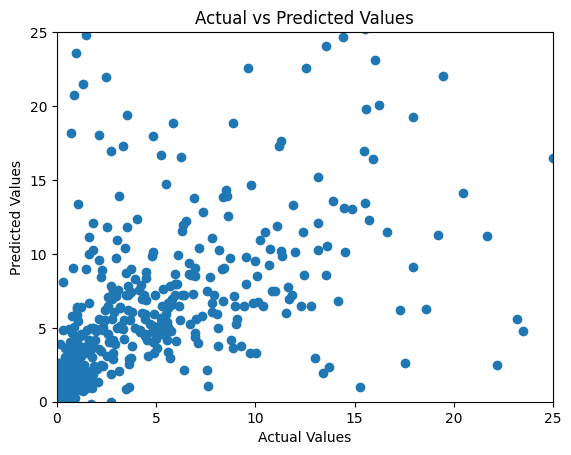

In [22]:
# create an empty dataframe
df = pd.DataFrame(columns=['text', 'label'])

# iterate over each file in the directory ../model/models
for filename in os.listdir('../model/models'):
    # set model_name to the filename without the extension or "model_weights_" that's at the beginning of the filename
    model_name = filename[14:-3]

    if 'complex' in model_name:
        continue

    print(f"Model Name: {model_name}")

    # the format of each model name is `xg_yg`, get the x and y values without the letter `g` and convert them to floats
    [x,y] = model_name.split('_')
    total = float(x[:-1])
    delta = float(y[:-1])

    # load the weights from this file
    model = torch.load(f'../model/models/{filename}')

    data_tensors = torch.load(f'../model/data/data_tensors_{model_name}.pt')
    target_tensors = torch.load(f'../model/data/target_tensors_{model_name}.pt')

    # normalize the target tensors
    target_mean = target_tensors.mean()
    target_std = target_tensors.std()

    # make a function to denormalize a prediction
    def denormalize(tensor):
        return tensor * target_std + target_mean

    target_tensors = (target_tensors - target_mean) / target_tensors.std()

    train_data, test_data, train_targets, test_targets = train_test_split(
        data_tensors, target_tensors, test_size=0.2, random_state=42
    )

    # Create datasets and data loaders
    train_dataset = PacketCaptureDataset(train_data, train_targets)
    test_dataset = PacketCaptureDataset(test_data, test_targets)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    input_size = len(
        train_dataset[0][0][0]
    )  # Assuming all packet captures have the same structure
    hidden_size = 64
    output_size = 1
    model = RNNModel(input_size, hidden_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.load_state_dict(torch.load(f'../model/models/model_weights_{model_name}.pt'))


    total_absolute_error = 0
    num_samples = len(test_targets)

    for i in range(num_samples):
        predicted_value = model(test_data[i].unsqueeze(0)).item()
        actual_value = test_targets[i].item()
        absolute_error = abs(predicted_value - actual_value)
        total_absolute_error += absolute_error

    average_absolute_error = total_absolute_error / num_samples
    print(f"Average Absolute Error: {average_absolute_error}")

    # get the average absolute error for the denormalized values
    total_absolute_error = 0
    num_samples = len(test_targets)

    for i in range(num_samples):
        predicted_value = denormalize(model(test_data[i].unsqueeze(0)).item())
        actual_value = denormalize(test_targets[i].item())
        absolute_error = abs(predicted_value - actual_value)
        total_absolute_error += absolute_error

    average_absolute_error = total_absolute_error / num_samples
    print(f"Average Absolute Error (Denormalized): {average_absolute_error}")

    # get the median absolute error
    absolute_errors = []
    for i in range(num_samples):
        predicted_value = model(test_data[i].unsqueeze(0)).item()
        actual_value = test_targets[i].item()
        absolute_error = abs(predicted_value - actual_value)
        absolute_errors.append(absolute_error)

    median_absolute_error = np.median(absolute_errors)
    print(f"Median Absolute Error: {median_absolute_error}")

    # get the median absolute error for the denormalized values
    absolute_errors = []
    for i in range(num_samples):
        predicted_value = denormalize(model(test_data[i].unsqueeze(0)).item())
        actual_value = denormalize(test_targets[i].item())
        absolute_error = abs(predicted_value - actual_value)
        absolute_errors.append(absolute_error)

    median_absolute_error = np.median(absolute_errors)
    print(f"Median Absolute Error (Denormalized): {median_absolute_error}")

    # get the mean square error
    total_square_error = 0
    for i in range(num_samples):
        predicted_value = model(test_data[i].unsqueeze(0)).item()
        actual_value = test_targets[i].item()
        square_error = (predicted_value - actual_value) ** 2
        total_square_error += square_error

    mean_square_error = total_square_error / num_samples
    print(f"Mean Square Error: {mean_square_error}")

    # get the mean square error for the denormalized values
    total_square_error = 0
    for i in range(num_samples):
        predicted_value = denormalize(model(test_data[i].unsqueeze(0)).item())
        actual_value = denormalize(test_targets[i].item())
        square_error = (predicted_value - actual_value) ** 2
        total_square_error += square_error

    mean_square_error = total_square_error / num_samples
    print(f"Mean Square Error (Denormalized): {mean_square_error}")



    # calculate the average percentage error of the model
    total_percentage_error = 0
    for i in range(num_samples):
        predicted_value = model(test_data[i].unsqueeze(0)).item()
        actual_value = test_targets[i].item()
        percentage_error = abs(predicted_value - actual_value) / abs(actual_value)
        total_percentage_error += percentage_error

    average_percentage_error = (total_percentage_error / num_samples) * 100
    print(f"Average Percentage Error: {average_percentage_error}%")
    # print the standard deviation of the percentage errors
    percentage_errors = []
    for i in range(num_samples):
        predicted_value = model(test_data[i].unsqueeze(0)).item()
        actual_value = test_targets[i].item()
        percentage_error = abs(predicted_value - actual_value) / abs(actual_value)
        percentage_errors.append(percentage_error)

    percentage_errors = np.array(percentage_errors)
    percentage_errors_std = np.std(percentage_errors)
    print(f"Standard Deviation of Percentage Errors: {percentage_errors_std}")


    # remove the max 2 percent of the errors and calculate the average percentage error
    sorted_errors = sorted(absolute_errors)
    num_samples_to_remove = int(num_samples * 0.02)
    sorted_errors = sorted_errors[:-num_samples_to_remove]
    average_percentage_error = (sum(sorted_errors) / len(sorted_errors)) / target_mean
    print(f"Average Percentage Error (Without Top 2%): {average_percentage_error * 100}%")
    # print the standard deviation of the percentage errors
    percentage_errors = []
    for i in range(num_samples):
        predicted_value = model(test_data[i].unsqueeze(0)).item()
        actual_value = test_targets[i].item()
        percentage_error = abs(predicted_value - actual_value) / abs(actual_value)
        percentage_errors.append(percentage_error)

    percentage_errors = np.array(percentage_errors)
    percentage_errors = percentage_errors[:-num_samples_to_remove]
    percentage_errors_std = np.std(percentage_errors)
    print(f"Standard Deviation of Percentage Errors (Without Top 2%): {percentage_errors_std}")


    # calculate the average percentage error of the model for denormalized values
    total_percentage_error = 0
    for i in range(num_samples):
        predicted_value = denormalize(model(test_data[i].unsqueeze(0)).item())
        actual_value = denormalize(test_targets[i].item())
        percentage_error = abs(predicted_value - actual_value) / abs(actual_value)
        total_percentage_error += percentage_error

    average_percentage_error = (total_percentage_error / num_samples) * 100
    print(f"Average Percentage Error (Denormalized): {average_percentage_error}%")

    # print the standard deviation of the percentage errors for denormalized values
    percentage_errors = []  
    for i in range(num_samples):
        predicted_value = denormalize(model(test_data[i].unsqueeze(0)).item())
        actual_value = denormalize(test_targets[i].item())
        percentage_error = abs(predicted_value - actual_value) / abs(actual_value)
        percentage_errors.append(percentage_error)

    percentage_errors = np.array(percentage_errors)
    percentage_errors_std = np.std(percentage_errors)
    print(f"Standard Deviation of Percentage Errors (Denormalized): {percentage_errors_std}")

    # remove the max 2 percent of the errors and calculate the average percentage error for denormalized values
    sorted_errors = sorted(absolute_errors)
    num_samples_to_remove = int(num_samples * 0.02)
    sorted_errors = sorted_errors[:-num_samples_to_remove]
    average_percentage_error = (sum(sorted_errors) / len(sorted_errors)) / target_mean
    print(f"Average Percentage Error (Without Top 2%, Denormalized): {average_percentage_error * 100}%")
    # print the standard deviation of the percentage errors for denormalized values
    percentage_errors = []
    for i in range(num_samples):
        predicted_value = denormalize(model(test_data[i].unsqueeze(0)).item())
        actual_value = denormalize(test_targets[i].item())
        percentage_error = abs(predicted_value - actual_value) / abs(actual_value)
        percentage_errors.append(percentage_error)

    percentage_errors = np.array(percentage_errors)
    percentage_errors = percentage_errors[:-num_samples_to_remove]
    percentage_errors_std = np.std(percentage_errors)
    print(f"Standard Deviation of Percentage Errors (Without Top 2%, Denormalized): {percentage_errors_std}")


    # calculate the median percentage error of the model
    percentage_errors = []
    for i in range(num_samples):
        predicted_value = model(test_data[i].unsqueeze(0)).item()
        actual_value = test_targets[i].item()
        percentage_error = abs(predicted_value - actual_value) / abs(actual_value)
        percentage_errors.append(percentage_error)
        if percentage_error < 0:
            print(f"Predicted: {predicted_value}, Actual: {actual_value}, PE: {percentage_error}")


    median_percentage_error = np.median(percentage_errors) * 100
    print(f"Median Percentage Error: {median_percentage_error}%")


    # calculate the median percentage error of the model for denormalized values
    percentage_errors = []
    for i in range(num_samples):
        predicted_value = denormalize(model(test_data[i].unsqueeze(0)).item())
        actual_value = denormalize(test_targets[i].item())
        percentage_error = abs(predicted_value - actual_value) / abs(actual_value)
        percentage_errors.append(percentage_error)
        if percentage_error < 0:
            print(f"Predicted: {predicted_value}, Actual: {actual_value}, PE: {percentage_error}")

    median_percentage_error = np.median(percentage_errors) * 100
    print(f"Median Percentage Error (Denormalized): {median_percentage_error}%")

    # plot the denormalized values for the actual and predicted values on testing set
    actual_values = []
    predicted_values = []
    for i in range(num_samples):
        predicted_value = denormalize(model(test_data[i].unsqueeze(0)).item())
        actual_value = denormalize(test_targets[i].item())
        actual_values.append(actual_value)
        predicted_values.append(predicted_value)

    plt.scatter(actual_values, predicted_values)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.xlim(0, 25)
    plt.ylim(0, 25)
    plt.show()


    # 







